In [1]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt



In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     1749 non-null   int64 
 1   News      1749 non-null   object
 2   Category  1749 non-null   object
dtypes: int64(1), object(2)
memory usage: 41.1+ KB


In [4]:
data.columns= ['index', 'News', 'Category']
data.to_csv('Dataset.csv', index=False)

In [5]:
data = pd.read_csv('Dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749 entries, 0 to 1748
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     1749 non-null   int64 
 1   News      1749 non-null   object
 2   Category  1749 non-null   object
dtypes: int64(1), object(2)
memory usage: 41.1+ KB


In [6]:
data.describe()

,index
count,1749.000000
mean,446.183533
std,267.400081
min,0.000000
25%,219.000000
50%,437.000000
75%,656.000000
max,999.000000


In [7]:
data.head()

,index,News,Category
0,1,Nottingham Forest have confirmed the signing o...,Football
1,2,Mason Greenwood has released a short statement...,Football
2,3,Former Spain international Isco remains on the...,Football
3,4,Mason Greenwood will not return to Manchester ...,Football
4,5,Paris Saint-Germain have confirmed that Kylian...,Football


In [8]:
data.Category.value_counts()

Cricket     1000
Football     749
Name: Category, dtype: int64

<AxesSubplot: >

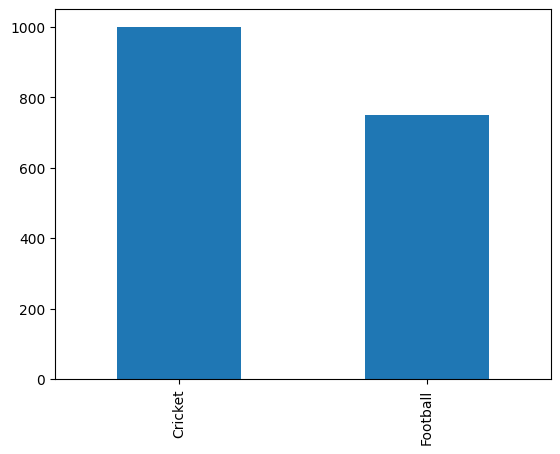

In [9]:
# plotting the value counts of category
data.Category.value_counts().plot(kind='bar')

In [10]:
data.isna().value_counts()

index  News   Category
False  False  False       1749
dtype: int64

In [11]:
data.News.empty

False

In [12]:
data.shape


(1749, 3)

In [13]:
for index, row in data.iterrows():
    if not row['News']:
        data.drop(index, inplace=True)


In [14]:
data.shape

(1749, 3)

In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sedairochak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
import string
def input_process(text):
    translator = str.maketrans('', '', string.punctuation)
    nopunc = text.translate(translator)
    words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]    #list comprehension method : maxm list operation lai single line of code ma lekhne
    return ' '.join(words)

In [17]:
def remove_stop_words(input):
    final_input = []
    for line in input:
        line = input_process(line)
        final_input.append(line)
    return final_input

In [19]:
f_df = pd.DataFrame( columns = ['News', 'Label'])
f_df['News'] = data['News']
f_df['Label'] = data['Category']
input = f_df['News']
output = f_df['Label']
input
input = remove_stop_words(input)
input


['Nottingham Forest confirmed signing free agent Andre Ayew despite interest Everton forward heavily linked move Toffees recent days Forest swooped sign Ghanian Speaking clubs official website finalising move forward said “It’s great feeling sign Nottingham Forest “I know big club know much club means city fanbase It’s always difficult whenever I’ve played Forest City Ground love stadium “Steve Cooper someone knows well knows work pitch strong relationship he’s special coach special human someone really look to” “I know bring team I’m ready give make sure able stay Premier League”',
 'Mason Greenwood released short statement stating relieved Greater Manchester Police dropped charges Man Utd forward Greenwood charged attempted rape engaging controlling coercive behaviour assault allegations relating woman last year following investigation GMP confirmed charges dropped GMP confirmed news statement earlier Thursday Given significant media coverage case fair share news 21yearold man arrest

In [20]:
f_df['News'] = input

In [21]:
#removing extra spaces
f_df['News'] = f_df['News'].apply(lambda x: re.sub(' +', ' ', x))

In [22]:
#removing numbers
f_df['News'] = f_df['News'].apply(lambda x: re.sub(r'\d+', '', x))

In [32]:
f_df['News'] = f_df['News'].astype(str)

In [44]:
f_df.fillna("NaN", inplace=True)

In [45]:
f_df.describe()

,News,Label
count,1749,1749
unique,1254,2
top,,Cricket
freq,250,1000


In [46]:
#lemmatization
nltk.download('omw-1.4')
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
f_df['News'] = f_df['News'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/sedairochak/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/sedairochak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [47]:
f_df.to_csv('preprocessed_Data.csv', index=False)

In [36]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [48]:
from wordcloud import WordCloud
from PIL import Image
import urllib
import requests

In [49]:
data = pd.read_csv('preprocessed_Data.csv')

Football


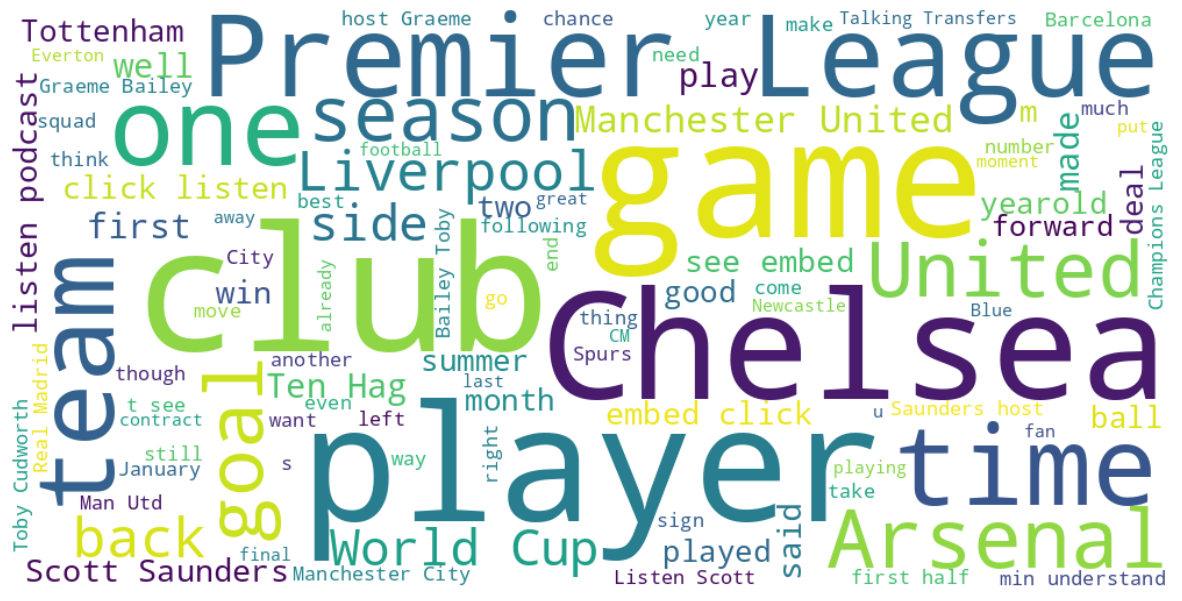

Cricket


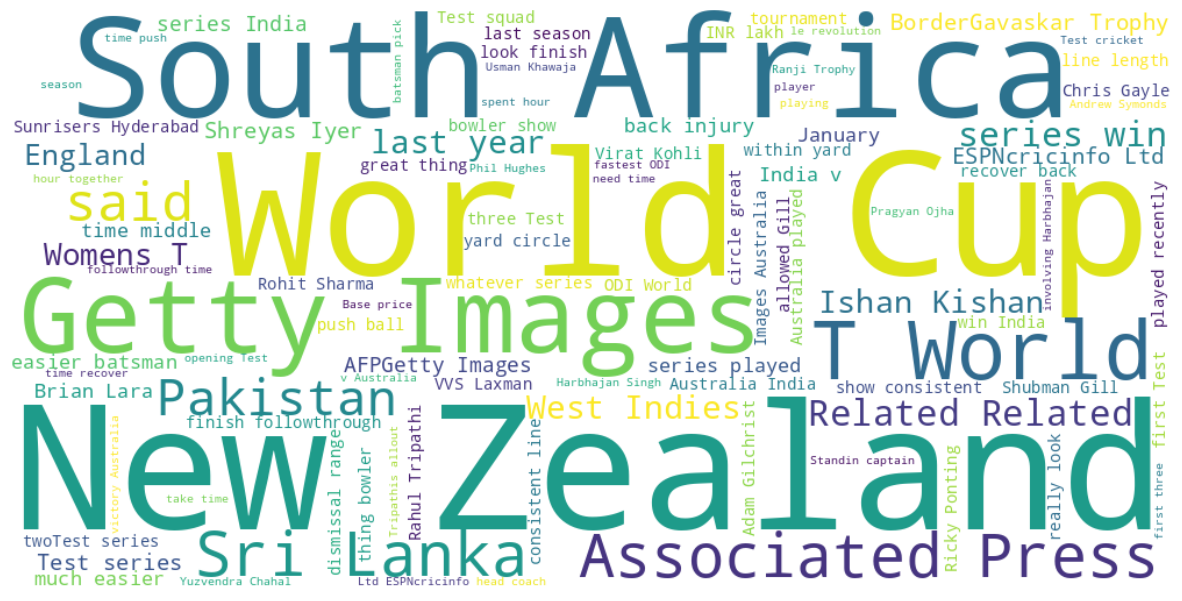

In [40]:
for i in data.Label.unique():
    news = ' '.join(data[data.Label == i].News.astype(str))
    wordcloud = WordCloud(width=1000, height=500, max_font_size=150, max_words=100, background_color="white").generate(news)
    print(i)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()